<a href="https://colab.research.google.com/github/deasadiqbal/computer-vision-project-with-keras-and-tensorflow/blob/main/DeepSparse_YOLOv8_Pipelines_With_Supervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies

In [7]:
!pip install supervision

In [8]:
!pip install deepsparse[yolov8]

  Using cached numpy-1.21.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.4.14 requires numpy>=1.22, but you have numpy 1.21.6 which is incompatible.
jaxlib 0.4.14+cuda11.cudnn86 requires numpy>=1.22, but you have numpy 1.21.6 which is incompatible.
plotnine 0.12.2 requires numpy>=1.23.0, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you ha

In [9]:
!pip install numpy==1.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.1 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
plotnine 0.12.2 requires numpy>=1.23.0, but you have numpy 1.22.0 which is incompatible.
sparsezoo 1.5.2 requires numpy<=1.21.6,>=1.0.0, but you have numpy 1.22.0 which is incompatible.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.12.0 which is incompatible.


### First look how to get model and put into deepsparse pipeline  

In [2]:
from deepsparse import Pipeline
import supervision as sv
model_path = "zoo:cv/detection/yolov8-l/pytorch/ultralytics/coco/base-none"
image = "/content/ex_object_detection.jpg"
yolo_pipeline = Pipeline.create(task='yolo', model_path=model_path)
pipeline_output = yolo_pipeline(images=image, iou_thres=0.6, conf_thres=0.001)
detection = sv.Detections.from_deepsparse(pipeline_output)


In [3]:
detection

Detections(xyxy=array([[-7.75733728, 18.6329953 , 63.64581451, 70.42897916],
       [-4.99357934,  6.17030985, 30.38582277, 32.11634743],
       [ 7.18264045,  5.25306417, 29.4716145 , 22.92431861],
       [ 2.21510525,  2.09067924, 12.92814443, 10.73469667]]), mask=None, confidence=array([36497.00390625, 20088.30078125,  8812.37011719,  7047.38037109]), class_id=array([8146, 6074, 8268, 6353]), tracker_id=None)

## Annotate single video Frame

In [4]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.1 MB/s eta 0:00:00


In [5]:
from pytube import YouTube
youtube = YouTube('https://www.youtube.com/watch?v=-vLTFQv2_Vo')
video = youtube.streams.get_highest_resolution()
video.download()

'/content/Cars On Highway - Free Stock Creative Commons Video.mp4'

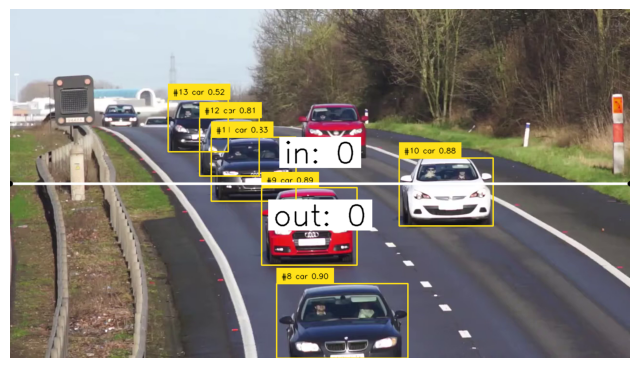

In [12]:
# Import necessary libraries, and alias 'numpy' as 'np' for convenience.
import numpy as np
import supervision as sv
from deepsparse import Pipeline

# Define a mapping of class IDs to class names.
classes = {2: 'car', 3: 'motercycle', 4: 'bus', 5:'truck'}

# Define the path to the input video.
VIDEO_PATH = '/content/Cars On Highway - Free Stock Creative Commons Video.mp4'

# Define the start and end points of a line.
LINE_START = sv.Point(0, 360)
LINE_END = sv.Point(1280, 360)

# get information about the video.
video_info = sv.VideoInfo.from_video_path(VIDEO_PATH)

# Create a generator to extract video frames.
frame_gen = sv.get_video_frames_generator(VIDEO_PATH)
frame = next(iter(frame_gen))

#'ByteTrack' object to track objects in frames.
byte_tracker = sv.ByteTrack()

#'LineZone' object to define a zone of interest as a line.
line_counter = sv.LineZone(start = LINE_START, end=LINE_END)

#'LineZoneAnnotator' object for annotating objects that cross the defined line
line_annotator = sv.LineZoneAnnotator(thickness = 4, text_thickness = 2, text_scale = 2)

'BoxAnnotator' object for annotating bounding boxes around detected objects.
box_annotator = sv.BoxAnnotator(thickness=2,text_thickness=1, text_scale=0.5)

model_path =  "zoo:cv/detection/yolov5-m/pytorch/ultralytics/coco/pruned70_quant-none"
yolo_pipeline = Pipeline.create(task='yolo', model_path=model_path)
pipeline_output = yolo_pipeline(images=frame, iou_thres=0.6, conf_thres=0.001)
detections = sv.Detections.from_deepsparse(pipeline_output)

# Filter detections based on class ID and confidence threshold.
detections = detections[(
                        (detections.class_id == 2) |
                        (detections.class_id == 3) |
                        (detections.class_id == 4) |
                        (detections.class_id == 5)
                        )
                         & (detections.confidence > 0.5)
                           ]
# Update the byte tracker with the detections.
detections = byte_tracker.update_with_detections(detections)

# Create labels for the detected objects.
labels = [ f"#{tracker_id} {classes[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, tracker_id in detections ]

# Annotate
frame = box_annotator.annotate(scene = frame, detections = detections, labels = labels)

# Trigger the line counter to count objects crossing the defined line.
line_counter.trigger(detections = detections)

# Annotate the frame with line information.
line_annotator.annotate(frame = frame, line_counter = line_counter)
# Display the annotated frame inline.
%matplotlib inline
sv.plot_image(frame, (8, 8))